<a href="https://colab.research.google.com/github/ajayjai30/CREDIT-SCORE-CLASSIFICATON/blob/main/CREDIT_SCORE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas_profiling

In [ ]:
#import pandas_profiling as n
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/credit_score.csv',low_memory=False)

In [ ]:
#n.ProfileReport(df)

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df=df.drop(['ID','Customer_ID','Name','SSN','Type_of_Loan','Credit_History_Age'],axis='columns')
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.shape

(100000, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [ ]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
#observing all the unique values in the dataset by each columns
for i in range(0,len(df.columns)):
  print(df.columns[i])
  print(df[df.columns[i]].unique())

Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Age
['23' '-500' '28_' ... '4808_' '2263' '1342']
Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Monthly_Inhand_Salary
[1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]
Num_Bank_Accounts
[   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 1644  823 1356 1651   87  711  450  210
 1671 1722  648  672 1662 1495  510  666  429 1131 1434  980 1026  526
  718 1300 1312 1315  501 1566  480 1042  322  628 1016  333 1265  791
  427  563  905 1190 1036 1611   

In [ ]:
#DATA CLEANING PROCESS
df['Age']=df['Age'].str.replace('_',' ')
df['Age']=df['Age'].astype(int)

In [ ]:
df['Occupation']=df['Occupation'].replace('_______',np.nan)

In [ ]:
df["Annual_Income"]=df['Annual_Income'].str.replace('_',' ')
df['Annual_Income']=df['Annual_Income'].astype(float)

In [ ]:
df['Num_of_Loan']=df['Num_of_Loan'].str.replace("_",' ')
df['Num_of_Loan']=df['Num_of_Loan'].astype(float)

In [ ]:
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.replace('_',' ')
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(float)

In [ ]:
df['Credit_Score']=df['Credit_Score'].replace(['Poor','Standard','Good'],[0,1,2])

In [ ]:
df['Monthly_Balance']=df['Monthly_Balance'].str.replace('_',' ')
df['Monthly_Balance']=df['Monthly_Balance'].astype(float)

In [ ]:
df['Payment_Behaviour']=df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [ ]:
df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.replace('_',' ')
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float)

In [ ]:
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].replace("NM","No")
df['Payment_of_Min_Amount']=df['Payment_of_Min_Amount'].replace(['Yes','No'],[1,0])

In [ ]:
df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace('_',' ')
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(float)

In [ ]:
df['Credit_Mix']=df['Credit_Mix'].replace("_",np.nan)
df['Credit_Mix']=df['Credit_Mix'].replace(['Standard','Good','Bad'],[1,2,0])

In [ ]:
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].replace('_',np.nan)
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      97909 non-null   float64
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                79805 non-null   fl

In [ ]:
df.isna().sum()

Month                           0
Age                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
df=df.fillna(method='ffill')
df=df.fillna(method='bfill')
df.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

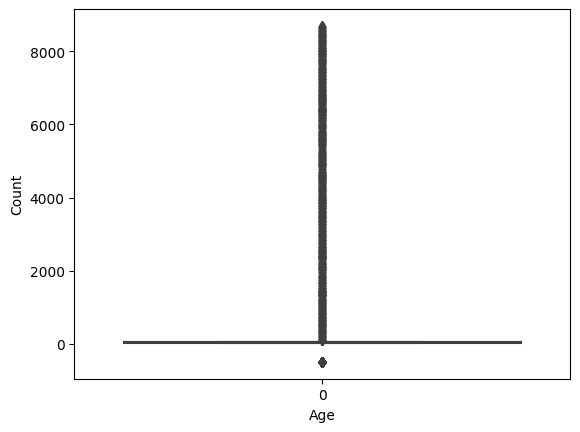

In [ ]:
#checking for outliers
sns.boxplot(df['Age'])
plt.xlabel("Age")
plt.ylabel('Count')
plt.show()

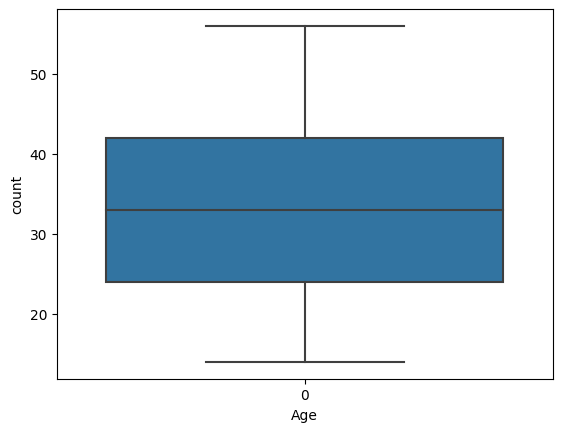

In [ ]:
#As all the values are outliers, Using Interquartile range method for reducing the outliers
d=df['Age']
Q1=df.Age.quantile(0.25)
Q2=df.Age.quantile(0.75)
IQR=Q2-Q1
data=df[(df.Age >= Q1-1.5*IQR)&(df.Age < Q2+1.5*IQR)]
sns.boxplot(data['Age'])
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df['Month']=l.fit_transform(df['Month'])
df['Occupation']=l.fit_transform(df['Occupation'])
df['Payment_Behaviour']=l.fit_transform(df['Payment_Behaviour'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int64  
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  int64  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  float64
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

In [ ]:
a=[df.columns]

In [ ]:
a

[Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
        'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
        'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
        'Monthly_Balance', 'Credit_Score'],
       dtype='object')]

In [ ]:
x=df.drop('Credit_Score',axis=1)
y=df['Credit_Score']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
f=RandomForestClassifier()
f.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
a=['Month', 'Age','Annual_Income', 'Monthly_Inhand_Salary',
        'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
        'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
        'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
        'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
        'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
        'Monthly_Balance','Occupation']
G=pd.Series(f.feature_importances_,index=a).sort_values(ascending=False)
G

Credit_Utilization_Ratio    0.117764
Num_of_Loan                 0.076473
Outstanding_Debt            0.072520
Num_of_Delayed_Payment      0.065167
Num_Credit_Inquiries        0.061819
Occupation                  0.048691
Payment_Behaviour           0.047043
Payment_of_Min_Amount       0.047014
Credit_Mix                  0.045759
Amount_invested_monthly     0.044932
Monthly_Inhand_Salary       0.044865
Num_Bank_Accounts           0.044774
Changed_Credit_Limit        0.042180
Interest_Rate               0.041073
Age                         0.039751
Num_Credit_Card             0.031635
Annual_Income               0.030651
Month                       0.029733
Delay_from_due_date         0.028014
Monthly_Balance             0.020739
Total_EMI_per_month         0.019402
dtype: float64

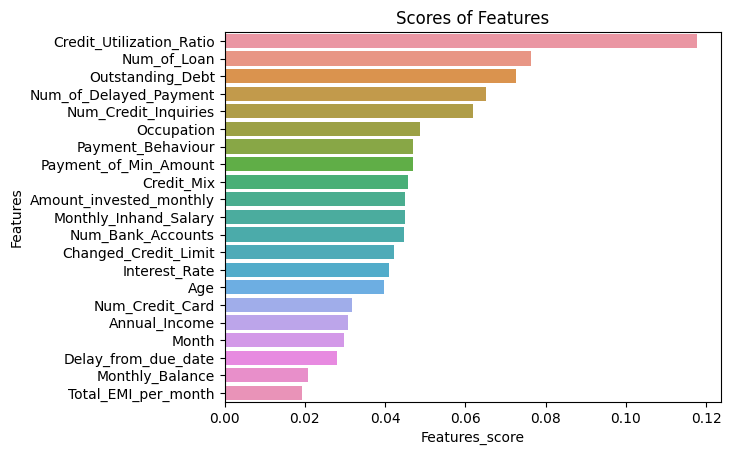

In [ ]:
sns.barplot(x=G,y=G.index)
plt.xlabel('Features_score')
plt.ylabel('Features')
plt.title('Scores of Features')
plt.show()

In [ ]:
 x=df.drop(columns=['Credit_Score'])
 y=df['Credit_Score']
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
 from sklearn.preprocessing import StandardScaler
 sc=StandardScaler()
 x_test=pd.DataFrame(x_test)

In [ ]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression
f=LinearRegression()
z=LogisticRegression()

In [ ]:
f.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=f.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,r2_score
r2_score(y_test,y_pred)

0.2814044062075265

In [ ]:
z.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred2=z.predict(x_test)
accuracy_score(y_pred2,y_test)

0.61855

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
g=DecisionTreeClassifier()
g.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred3=g.predict(x_test)

In [ ]:
accuracy_score(y_pred3,y_test)

0.6969

In [ ]:
#using hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parametres={'max_features':['log2','sqrt','auto'],'criterion':['entropy','gini'],'max_depth':[2,3,5,10,50],'min_samples_split':[2,3,58,100],'min_samples_leaf':[1,5,8,10]}
grid_obj=GridSearchCV(g,parametres)
h=grid_obj.fit(x_train,y_train)
g=grid_obj.best_estimator_
g.fit(x_train,y_train)
y_pred=g.predict(x_test)
print("Accuracy_score is=",accuracy_score(y_pred,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Accuracy_score is= 0.7044


In [ ]:
from sklearn.ensemble import RandomForestClassifier
q=RandomForestClassifier()
q.fit(x_train,y_train)
y_pred4=q.predict(x_test)
accuracy_score(y_test,y_pred)

0.7044